<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/pca_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 12th October, 2022
# MNIST dataset downloaded from Kaggle : 
#     https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?resource=download
# Ref: https://github.com/ranasingh-gkp/PCA-TSNE-on-MNIST-dataset/blob/master/14_15_16(PCA%2CT_SNE).ipynb
#      https://ryanwingate.com/intro-to-machine-learning/unsupervised/pca-on-mnist/


## Call libraries

In [1]:
# 1.0

import numpy as np
import pandas as pd

# 1.1
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1.2
import matplotlib.pyplot as plt
import seaborn as sns

# 1.3
import os,time

In [2]:
# 1.4 Display multiple outputs from a cell:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Mount gdrive

In [3]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## Read Data

In [3]:
# 2.1 Path to mnist csv file Folder:

pathToFolder = "/gdrive/MyDrive/Colab_data_files/mnist"

In [4]:
# 2.2 Change current directory to where csv files are:

os.chdir(pathToFolder)
os.listdir()

['mnist_test.csv', 'mnist_train.csv']

In [5]:
# 2.3 Read MNIST data file:

df = pd.read_csv('mnist_train.csv')

In [6]:
# 2.4 Shape and dtypes?

df.shape    # (60000, 785)
print("\n==========\n")
df.dtypes

(60000, 785)

label    int64
1x1      int64
1x2      int64
1x3      int64
1x4      int64
         ...  
28x24    int64
28x25    int64
28x26    int64
28x27    int64
28x28    int64
Length: 785, dtype: object

In [7]:
# 2.5 Look at the data:

df.head(5)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# 2.6 Brief statistical description of data:

df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [9]:
# 2.7 Separate predictors from labels:

y = df.pop('label')
X = df

## Plot a digit

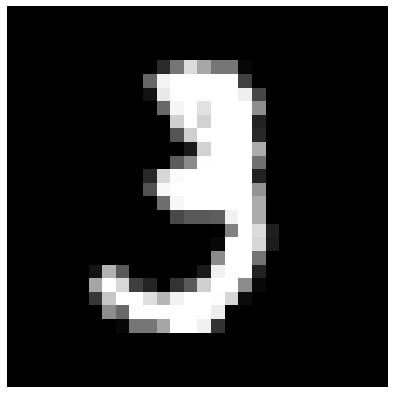



It is digit:  3




In [11]:
# 3.0 Plot digit at idx:

# 3.1 Data?
idx = 10   # Plot image at 11th row
im = df.iloc[idx,:].values.reshape(28,28)


# 3.2 Plot digit
_=plt.figure(figsize=(10,7)) ;
_=plt.imshow(im, cmap = "gray");
_=plt.axis("off")
plt.show();


# 3.3 Digit label
print("\n=======\n")
print("It is digit: ", y[idx])
print("\n=======\n")

## Pre-processing
Before PCA data must be standardized

In [10]:
# 4.0 Standardize data:
#      Before PCA data must be standardized 

ss= StandardScaler()
ss.fit(X)
X = ss.transform(X)

StandardScaler()

## PCA now

In [ ]:
# 5.0 Instantiate PCA class with default parameters:
#       https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

pca = decomposition.PCA(n_components =2)

In [ ]:
# 5.1 Fit and transform X:
 
pca_data = pca.fit_transform(X)

In [ ]:
# 5.2 Shape of transformed data:

pca_data.shape
print("\n==========\n")
pca_data[:2]


(60000, 2)

array([[-0.92228914, -4.81376062],
       [ 8.70902199, -7.7551196 ]])

## Analyse PCA 

In [ ]:
# 6.0 Transform numpy array to pandas DataFrame:

pca_df = pd.DataFrame(
                       data=pca_data,
                       columns=("1st_principal", "2nd_principal")
                      )
# 6.0.1
pca_df.head()

,1st_principal,2nd_principal
0,-0.922289,-4.813761
1,8.709022,-7.755120
2,2.328452,9.430657
3,-6.582138,-3.747012
4,-5.183219,3.132597


In [ ]:
# 6.1 Make a copy to work with:

pcadf = pca_df.copy()

In [ ]:
# 6.2 Add a column of digit labales also:

pca_df['labels'] = y
pca_df.head()

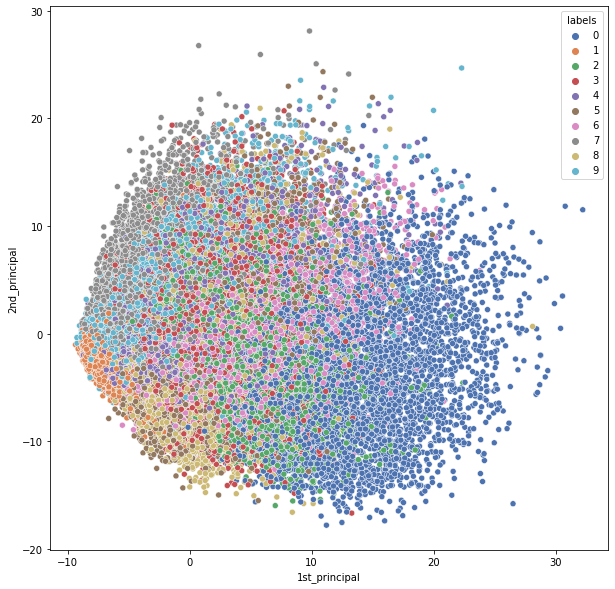

In [ ]:
# 6.3 Draw a scatterplot coloured by labels:
#      How good PCA has been in separating data-points

_=plt.figure(figsize = (10,10))
sns.scatterplot(
                 data = pca_df,
                 x = "1st_principal",
                 y = "2nd_principal",
                 hue = "labels",
                 palette="deep"
                ) ;

In [ ]:
# 6.4 Explained variance by each pricipal component:

print(pca.explained_variance_ratio_)

[0.05646717 0.04078272]


In [ ]:
# 6.5 Cumulative variance, component-by-component:

cum_var_explained = np.cumsum(pca.explained_variance_ratio_)
cum_var_explained

array([0.05646717, 0.09724989])

## PCA for dimensionality reduction
What is appropriate value of n_components?

In [12]:
# 7.0 PCA for dimensionality redcution (non-visualization)
#       Let n_components be 780 only:

n_comp = 780
pca = decomposition.PCA(n_components =n_comp)
pca_data = pca.fit_transform(X)

In [ ]:
# 7.1 Explained variance, component by component

pca.explained_variance_ratio_.shape
pca.explained_variance_ratio_[:10]

(784,)

array([0.05646717, 0.04078272, 0.0373938 , 0.02885115, 0.02521109,
       0.0219427 , 0.01923344, 0.01745799, 0.01535092, 0.0140172 ])

In [ ]:
# 7.2 Cumulative variance, component by component

cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

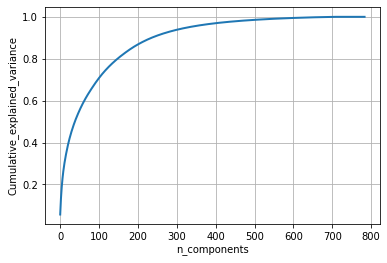

In [ ]:
# 8.0 Plot the cumulative variance vs n_componets:

_=plt.figure(1, figsize=(6, 4))

_=plt.plot(cum_var_explained, linewidth=2)
_= plt.axis('tight')
_= plt.grid()
_= plt.xlabel('n_components')
_= plt.ylabel('Cumulative_explained_variance')
plt.show()


## Correlation between Principal components
Correlation between principal components is zero

In [ ]:
n_comp = 10
pca = decomposition.PCA(n_components =n_comp)
pca_cor = pca.fit_transform(X)

In [ ]:
col_names = ["c" + str(i)  for i in range(n_comp)]
pca_cor = pd.DataFrame(pca_cor, columns = col_names)
pca_cor.head(2)

In [18]:
dataplot = pca_cor.corr()

In [ ]:
# plotting correlation heatmap
abc = sns.heatmap(dataplot, cmap="YlGnBu", annot=True)
plt.plot()

In [ ]:
# Correlation between principal components:

print(data.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
np.corrcoef(pca_data[:, :10])

## Classification with PCA components
Classification with just 150 features (principal components) as per above graph

In [20]:
pca = decomposition.PCA(n_components = 150)
pca_rf = pca.fit_transform(X)

In [21]:
# Check data shape
pca_rf.shape

(60000, 150)

In [22]:
# 9.0 Split PCA components into train/test:

X_train, X_test, y_train, y_test = train_test_split(
                                                    pca_rf, y, 
                                                    test_size=0.33) 
                                                    

In [23]:
# 9.1 Instantiate Random Forest Classifier class:

clf = RandomForestClassifier(
                             n_estimators=300,
                             max_depth=None
                             )

In [25]:
# 9.2 Train classifier:
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print((end-start) / 60)   # 4 minutes


RandomForestClassifier(n_estimators=300)

3.6377936085065206


In [26]:
# 9.3 Make predictions over X_test:

y_preds = clf.predict(X_test)

In [27]:
# 10.0 Get accuracy score:
#      Logloss would have been a better measure

acc = accuracy_score(y_test, y_preds)
acc

0.9455050505050505

In [28]:
# 10.1 Get confusion matrix:

confusion_matrix(y_test, y_preds)

array([[1940,    0,    6,    4,    2,    2,   13,    1,    5,    0],
       [   0, 2210,   19,    8,    5,    0,    6,    4,    5,    5],
       [  10,    3, 1783,   32,    9,    1,   15,   11,   23,    7],
       [   4,    2,   40, 1878,    3,   25,    1,   21,   39,   20],
       [   3,    3,   19,    0, 1838,    4,    6,   11,   11,   52],
       [  15,    1,   10,   52,    8, 1644,   23,    6,   19,   10],
       [   6,    0,   14,    1,   12,   22, 1932,    0,    6,    0],
       [   6,    8,   17,    9,   15,    0,    0, 1983,    3,   39],
       [   2,   18,   22,   58,    9,   37,    6,    7, 1700,   21],
       [   7,    1,    4,   20,   36,    3,    0,   56,   10, 1813]])

In [ ]:
##################### I am Done #############################